In [2]:
import numpy as np 
import pandas as pd

In [3]:
df=pd.read_csv('./datasets/Bangalore_rent.csv')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,2,BHK,Independent Floor,kamakshipalya,"20,000",1140,Semi-Furnished,2 bathrooms
1,OWNER,2,BHK,Independent House,Kadugodi Industrial Area,"8,000",840,Semi-Furnished,2 bathrooms
2,OWNER,2,BHK,Independent House,Koramangala,"21,000",1000,Semi-Furnished,2 bathrooms
3,OWNER,1,BHK,Apartment,Sadduguntepalya,"9,000",550,Semi-Furnished,1 bathrooms
4,OWNER,3,BHK,Apartment,Chandapura,"17,000",1230,Furnished,3 bathrooms


In [4]:
df.drop(columns=['seller_type','layout_type','bathroom'],inplace=True)
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,2,Independent Floor,kamakshipalya,"20,000",1140,Semi-Furnished
1,2,Independent House,Kadugodi Industrial Area,"8,000",840,Semi-Furnished
2,2,Independent House,Koramangala,"21,000",1000,Semi-Furnished
3,1,Apartment,Sadduguntepalya,"9,000",550,Semi-Furnished
4,3,Apartment,Chandapura,"17,000",1230,Furnished


In [5]:
df.shape

(23540, 6)

In [6]:
df.isnull().sum()

bedroom          0
property_type    0
locality         0
price            0
area             0
furnish_type     0
dtype: int64

In [7]:
df['price'] = df['price'].str.replace(r'[^\d.]+', '', regex=True)

In [8]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [9]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,2,Independent Floor,kamakshipalya,20000.0,1140,Semi-Furnished
1,2,Independent House,Kadugodi Industrial Area,8000.0,840,Semi-Furnished
2,2,Independent House,Koramangala,21000.0,1000,Semi-Furnished
3,1,Apartment,Sadduguntepalya,9000.0,550,Semi-Furnished
4,3,Apartment,Chandapura,17000.0,1230,Furnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23540 entries, 0 to 23539
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        23540 non-null  int64  
 1   property_type  23540 non-null  object 
 2   locality       23540 non-null  object 
 3   price          23540 non-null  float64
 4   area           23540 non-null  int64  
 5   furnish_type   23540 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


In [11]:
df["house_price"] = (df["price"] * 12 * 100) / 3

In [12]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,2,Independent Floor,kamakshipalya,20000.0,1140,Semi-Furnished,8000000.0
1,2,Independent House,Kadugodi Industrial Area,8000.0,840,Semi-Furnished,3200000.0
2,2,Independent House,Koramangala,21000.0,1000,Semi-Furnished,8400000.0
3,1,Apartment,Sadduguntepalya,9000.0,550,Semi-Furnished,3600000.0
4,3,Apartment,Chandapura,17000.0,1230,Furnished,6800000.0


In [13]:
df.bedroom.value_counts()

bedroom
2     10459
1      7536
3      4821
4       605
5        87
6        15
8         6
7         5
10        3
15        3
Name: count, dtype: int64

In [14]:
df = df[df['bedroom'] <= 5]

In [15]:
df.property_type.value_counts()

property_type
Apartment            12839
Independent House     4803
Independent Floor     4361
Studio Apartment      1120
Villa                  363
Penthouse               22
Name: count, dtype: int64

In [16]:
df["property_type"] = df["property_type"].replace("Studio Apartment", "Apartment")
df["property_type"] = df["property_type"].replace("Independent Floor", "Villa")
df["property_type"] = df["property_type"].replace("Penthouse", "Villa")

In [17]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,2,Villa,kamakshipalya,20000.0,1140,Semi-Furnished,8000000.0
1,2,Independent House,Kadugodi Industrial Area,8000.0,840,Semi-Furnished,3200000.0
2,2,Independent House,Koramangala,21000.0,1000,Semi-Furnished,8400000.0
3,1,Apartment,Sadduguntepalya,9000.0,550,Semi-Furnished,3600000.0
4,3,Apartment,Chandapura,17000.0,1230,Furnished,6800000.0


In [18]:
df.locality.value_counts().describe()

count     879.000000
mean       26.744027
std        85.476684
min         1.000000
25%         1.000000
50%         3.000000
75%        14.000000
max      1310.000000
Name: count, dtype: float64

In [19]:
locality_counts = df["locality"].value_counts()
df = df[df["locality"].isin(locality_counts[locality_counts >=10].index)]

In [20]:
df.locality.nunique()

258

In [21]:
df.shape

(21904, 7)

In [22]:
df.furnish_type.value_counts()

furnish_type
Semi-Furnished    18316
Furnished          2251
Unfurnished        1337
Name: count, dtype: int64

In [23]:
df["furnish_type"] = df["furnish_type"].replace("Semi-Furnished", "Furnished")

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

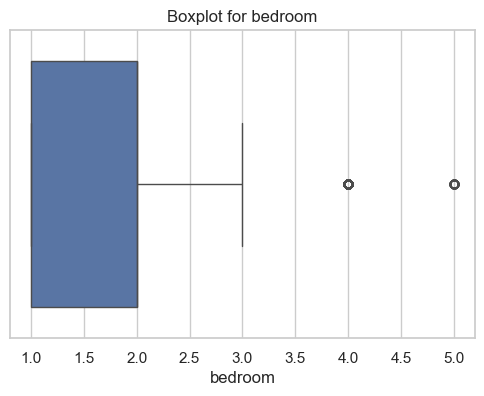

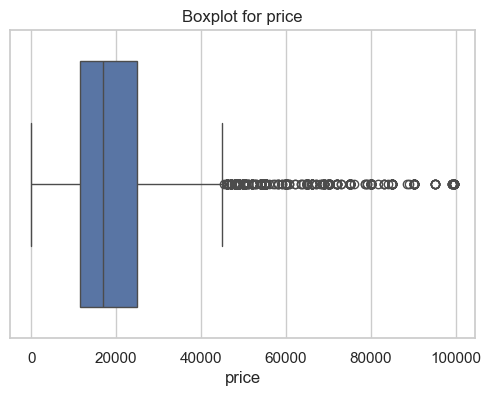

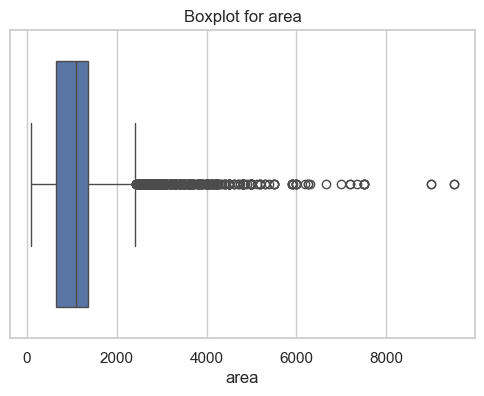

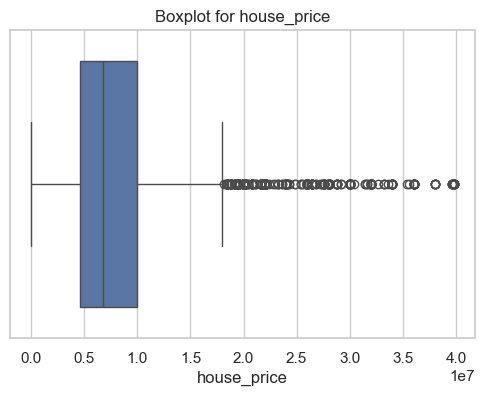

In [25]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

df_numeric = df.select_dtypes(include=['float64', 'int64'])  
for column in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [26]:
for column in df_numeric.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [27]:
df.shape

(20090, 7)

In [28]:
df.drop(columns=['price'],inplace=True)

In [29]:
df.rename(columns={'house_price': 'price'}, inplace=True)

In [30]:
df.head()

,bedroom,property_type,locality,area,furnish_type,price
1,2,Independent House,Kadugodi Industrial Area,840,Furnished,3200000.0
2,2,Independent House,Koramangala,1000,Furnished,8400000.0
3,1,Apartment,Sadduguntepalya,550,Furnished,3600000.0
4,3,Apartment,Chandapura,1230,Furnished,6800000.0
5,3,Apartment,Yelahanka New Town,1200,Furnished,5600000.0


In [31]:
df = pd.get_dummies(df).astype(int)

In [32]:
df['price'] = df['price'] / 100000

In [33]:
df.head()

,bedroom,area,price,property_type_Apartment,property_type_Independent House,property_type_Villa,locality_25th B Main Rd,locality_2nd Phase,locality_5th Phase,locality_7th Cross,...,locality_Yelahanka New Town,locality_Yelahanka Satellite Town,locality_Yemalur,locality_Yeshwanthpur,locality_Yeshwantpur,locality_byatarayanapura,locality_hebbal kempapura,locality_hongasandra bangalore,furnish_type_Furnished,furnish_type_Unfurnished
1,2,840,32.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1000,84.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,550,36.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,1230,68.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,1200,56.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [34]:
df.shape

(20090, 266)

In [35]:
df.head()

,bedroom,area,price,property_type_Apartment,property_type_Independent House,property_type_Villa,locality_25th B Main Rd,locality_2nd Phase,locality_5th Phase,locality_7th Cross,...,locality_Yelahanka New Town,locality_Yelahanka Satellite Town,locality_Yemalur,locality_Yeshwanthpur,locality_Yeshwantpur,locality_byatarayanapura,locality_hebbal kempapura,locality_hongasandra bangalore,furnish_type_Furnished,furnish_type_Unfurnished
1,2,840,32.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1000,84.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,550,36.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,1230,68.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,1200,56.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [36]:
target=df.price
df.drop(columns=['price'],inplace=True)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.2,random_state=10)

In [38]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-1282910254608.5894

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), df,target, cv=cv)

array([0.70698927, 0.70456623, 0.70805664, 0.71322504, 0.72158021])

In [40]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(df,target)

,model,best_score,best_params
0,linear_regression,0.710883,{'fit_intercept': False}
1,lasso,0.641218,"{'alpha': 0.1, 'selection': 'cyclic'}"
2,decision_tree,0.776967,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [46]:
model=DecisionTreeRegressor(criterion= 'friedman_mse',splitter='random')
model.fit(df,target)
model.score(X_test, y_test)

0.9311867405023107

In [48]:
import pickle
with open('Bangalore_model.pickle','wb') as f:
    pickle.dump(model,f)

In [50]:
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("Bangalore_columns.json","w") as f:
    f.write(json.dumps(columns))